<h1 dir = "ltr">Finding patterns in taxi rides in Chicago at November 2017
<h2 dir="ltr">Introduction</h2>
<div dir="ltr">The following report contains a detailed analysis of taxi rides in Chicago at November 2017. The report includes a pre-analysis of the data and analysis of passenger preferences. In addition, it contains a reasoned evaluation of the impact of external factors on rides. The analysis was performed for Zuber, a new ride-sharing company that's launching in Chicago.<br/>
The report consists of the following sections:
<ul>
    <li><a href="#Dealing">Obtaining data, and preliminary evaluation of data quality</a></li>
    <li><a href="#pre">Pre-processing of the obtained data:</a></li>
        <ul>
            <li><a href="#nun">Missing values</a></li>
            <li><a href="#dup">Duplicates</a></li>
            <li><a href="#type">Data type</a></li>
        </ul>
   <li><a href="#analysis">Analysis:</a></li>
        <ul>       
            <li><a href="#top">Top 10 neighborhoods</a></li>
            <li><a href="#drop">Distribution of average number of dropoff in top 10 neighborhoods</a></li>
            <li><a href="#taxi">Distribution of number of rides for different taxi companies</a></li>
        </ul>    
    <li><a href="#hypo">Hypotheses testing:</a></li>
        <ul>       
            <li><a href="#Avg">The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays</a></li>
        </ul>  
    <li><a href="#conclusion">Final conclusions </a></li>
</ul>

</div>

###  <a id="Dealing"></a>Obtaining data, and preliminary evaluation of data quality

In [1]:
import pandas as pd
!pip install --upgrade psycopg2-binary
import matplotlib.pyplot as plt
import plotly.express as px

try:
    cabs = pd.read_csv('project_sql_result_01.csv')
except:
    cabs = pd.read_csv('/datasets/project_sql_result_01.csv')
try:
    location = pd.read_csv('project_sql_result_04.csv')
except:
    location = pd.read_csv('/datasets/project_sql_result_04.csv')
try:
    loop_rides = pd.read_csv('project_sql_result_07.csv')
except:
    loop_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

cabs.info()
location.info()
loop_rides.info()

display(cabs.sample(5))
display(location.sample(5))
display(loop_rides.sample(5))

display(cabs.describe())
display(location.describe())
display(loop_rides.describe())


Requirement already up-to-date: psycopg2-binary in c:\users\danie\anaconda3\lib\site-packages (2.8.6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_t

,company_name,trips_amount
11,Globe Taxi,4383
17,Chicago Medallion Management,1955
15,Checker Taxi Affiliation,2216
7,Sun Taxi,7701
42,1085 - 72312 N and W Cab Co,29


,dropoff_location_name,average_trips
75,Calumet Heights,9.566667
11,East Village,1212.066667
46,Chinatown,52.433333
26,Hyde Park,255.133333
74,Beverly,10.500000


,start_ts,weather_conditions,duration_seconds
414,2017-11-18 05:00:00,Good,1336.0
834,2017-11-04 16:00:00,Bad,3180.0
996,2017-11-11 11:00:00,Good,2110.0
970,2017-11-25 13:00:00,Good,1800.0
769,2017-11-11 08:00:00,Good,1364.0


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### <a id="pre"></a>Pre-processing of the obtained data

#### <a id="nun"></a>Missing values

In [2]:
display(len(cabs[cabs.isnull().any(axis=1)]))
display(len(location[location.isnull().any(axis=1)]))
display(len(cabs[cabs.isnull().any(axis=1)]))
display(len(loop_rides.query('duration_seconds == 0')))
loop_rides = loop_rides.query('duration_seconds != 0')

0

0

0

6

#### <a id="dup"></a>Duplicates

In [3]:
display(len(cabs[cabs.duplicated()]))
display(len(location[location.duplicated()]))
display(len(loop_rides[loop_rides.duplicated()]))
loop_rides = loop_rides.drop_duplicates()
loop_rides.info()

0

0

197

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            865 non-null    object 
 1   weather_conditions  865 non-null    object 
 2   duration_seconds    865 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.0+ KB


#### <a id="type"></a> Data type  

In [4]:
location.average_trips = location.average_trips.astype(int)
loop_rides.start_ts = pd.to_datetime(loop_rides.start_ts, format='%Y-%m-%dT%H:%M:%S')
loop_rides.duration_seconds = loop_rides.duration_seconds.astype(int) 


### <a id="analysis"></a> Analysis

#### <a id="top"></a> Top 10 neighborhoods

In [5]:
top_10 = location.sort_values('average_trips', ascending = False)
top_10.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


#### <a id="drop"></a> Distribution of average number of dropoffs in top 10 neighborhoods

In [14]:
fig = px.bar(top_10.head(10), 
             x='dropoff_location_name', 
             y='average_trips', 
             title='Distribution of average number of dropoffs in top 10 neighborhoods', 
             labels={'average_trips':'Average number of dropoff', 'dropoff_location_name':'Top 10 Neighborhoods'},
             text='average_trips')
fig.update_xaxes(
        tickangle = 90,
        title_font = {"size": 15},
        title_standoff = 60
)
fig.update_yaxes(title_font = {"size": 15})

fig.show()


Distribution of average number of dropoff in top 10 neighborhoods:  
We can see that there is a large variability in the average dropoffs between the different neighborhoods, even within the top 10 neighborhood. We see a ten fold difference between the first and the last neighborhoods. I would guess that these neighborhoods are not regular saburban neighborhoods. We know that the airport is located in O'Hara neighborhood, which contributed to its high dropoff number. Accordingly, we can assume that the other nighborhoods popularity derived either from its location in the city centre, where people go to shop or for entertainment (resturants, bars, movies, etc.) or maybe in these neighborhoods there are culsters of offices and work places.  



#### <a id="taxi"></a> Distribution of number of rides for different taxi companies

In [7]:
#uniting companies with small amount of rides:
cabs.loc[cabs['trips_amount'] < 50, 'company_name'] = 'Others'
cabs_grouped = cabs.groupby('company_name')['trips_amount'].agg(sum).reset_index().sort_values('trips_amount', ascending = False)

In [19]:
fig = px.bar(cabs_grouped, 
             x='company_name', 
             y='trips_amount', 
             title='Distribution of number of rides for different taxi companies', 
             labels={'trips_amount':'Number of rides', 'company_name':'Taxi companies'},
             text='trips_amount')
fig.update_xaxes(
        tickangle = 60,
        title_font = {"size": 20},
        title_standoff = 90)
fig.update_yaxes(title_font = {"size": 20})

fig.show()

Distribution of number of rides for different taxi companies:  
All the companies with very few trips (less than 50) were grouped to one group called 'Others'.    
We can see that also here we have a large variability in the trips amount of different taxi companies. 
We can see that 'Flash Cab' company is the dominant player in the taxi market, having almost double amount of trips from the second taxi company in the list. I would guess that this company have an advantage over the other companies. There are several possible explanation for that, among them:

    1. They has an exclusive contract with the airport or with other companies that uses trasportation on a regular basis.
    2. Their advertising campaign is very good.  
    3. They offer special services or prices that other companies does not have.  
    4. The company was founded when there were not many other companies and their service is good, so people prefer to use a known and familiar company.  
There are other taxi companies with high trip amount. I guess they have their advantage as well.    
In addition, the df did not include information about the number of taxi vehicles each company has. I assume that the companies with the smallest trip amount are a companies of one vehicles, while the companies with high number of trips have dozens or even hundred of vehicles.  


 ### <a id="hypo"></a> Hypotheses testing:

 #### <a id="Avg"></a> The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

H₀: The average durations of rides from the Loop to O'Hare International Airport on Saturdays are equal in good and bad weather.  
H1: The average durations of rides from the Loop to O'Hare International Airport on Saturdays are not equal in good and bad weather. 

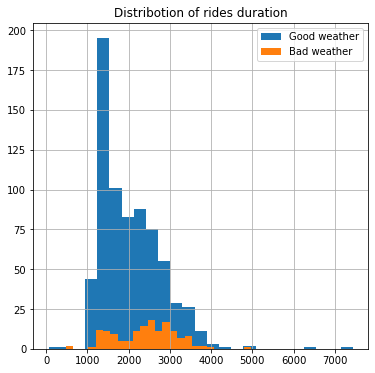

In [9]:
#Slicing the data according to the weather:
good = loop_rides.query('weather_conditions == "Good"')
bad = loop_rides.query('weather_conditions == "Bad"')
#plotting histogram in order to check for normal distribution:
good.duration_seconds.hist(bins =25 , figsize = (6,6), label='Good weather')
bad.duration_seconds.hist(bins =25 , figsize = (6,6), label='Bad weather')

plt.title('Distribotion of rides duration')
plt.legend(loc='upper right');

In [10]:
display(good.describe())
bad.describe()

,duration_seconds
count,717.000000
mean,2049.259414
std,753.877274
min,60.000000
25%,1440.000000
50%,1916.000000
75%,2493.000000
max,7440.000000


,duration_seconds
count,148.000000
mean,2409.229730
std,751.544705
min,480.000000
25%,1746.000000
50%,2463.500000
75%,2940.000000
max,4980.000000


In [11]:
import scipy.stats as st
#test for equal varience
print('Levene test result:', st.levene(good.duration_seconds,bad.duration_seconds, center='mean'))
#statistic test:
alpha = .05 
results = st.ttest_ind(good.duration_seconds,bad.duration_seconds, equal_var = True)
print('Ttest pValue:', results.pvalue)

Levene test result: LeveneResult(statistic=0.022450620616658166, pvalue=0.8809295587305221)
Ttest pValue: 1.5394237752380357e-07


Testing the average duration of rides from the Loop to O'Hare International Airport on Saturdays, in good or bad weather:  
Data was sliced to the desired weather condition.  
Histograms were plotted in order to look at the distribotions. Both groups's distribotions are normal, therfore we can use ttest.  
Alpha value was set to 0.05.

Since we want to test the hypothesis on two statistical populations, we have to use st.ttest.ind. The first array tested was the duration_seconds in good weather, and the second array was duration_seconds in bad weather. Although std values are very similar, group size is very different. In order to varify that variances are condisered as equal, we performed levene test. The null hypothsis for the levene test is that variences are equals. Since the PValue was higher than 0.05, we cannot reject the null hypothsis and the variences are equals, so I set equal_var = True.    
Ttest = Our pValue is lower than 0.05. It means that we can reject the null hypothesis and therefore, The average durations of rides from the Loop to O'Hare International Airport on Saturdays are not equal in good and bad weather.  

We set another alternative hypothesis:  
H1: The average durations of rides from the Loop to O'Hare International Airport on rainy Saturdays is higher than in good weather (H0 remain the same).  


In [12]:
print('p-value: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (bad.duration_seconds.mean() > good.duration_seconds.mean()):
        print("We reject the null hypothesis, therefore the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is higher than in good-weather-Saturdays")
else:
        print("We can't reject the null hypothesis") 

p-value:  7.697118876190178e-08
We reject the null hypothesis, therefore the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is higher than in good-weather-Saturdays


In [13]:
grouped_bad = bad.groupby('start_ts')['start_ts'].agg('count')
print('mean number of rides per hour at bad weather:', grouped_bad.mean())
grouped_good = good.groupby('start_ts')['start_ts'].agg('count')
print('mean number of rides per hour at good weather:',grouped_good.mean())

mean number of rides per hour at bad weather: 11.384615384615385
mean number of rides per hour at good weather: 10.701492537313433


In order to test this second H₁, we have to devide pValue by two since its one sided test. We can reject the null hypothesis only if pValue/2 is lower than the alpha value and in addition, the mean  ride duration in bad weather is higher than the mean ride duration in good weather. After testing these two criteria we reject the null hypothesis, therefore the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is higher than in good-weather-Saturdays.

### <a id="conclusion"></a>Final conclusions

Final conclusions:  
In this report we worked with taxi rides data, from November 2017.   
Data pre-processing includes:  
- Deleting duplicates 
- Deleting rows with missing values  
- Changing incorrect data types  
After pre-proccessing we analyzed the following parameters:  
1. Distribution of average number of dropoff in top 10 neighborhoods - There is a large variability in the number of dropoffs within the different neighbohoods, and even withing the top 10 neighborhoods. That imply that several heighborhoods are more popular than other, either because they are in the city center, or have busy shopping centers, working center, or where the airport is located.
2. Distribution of number of rides for different taxi companies - Also here we can see there is a large variability in the number of trips between different taxi companies. We can see that there is one leading company, 'Flash Cab', but there are several other companies with high number of trips.  

We tested an hypothesis on the impact of external factor on rides:
- The average durations of rides from the Loop to O'Hare International Airport on Saturdays are equal in good and bad weather - Our conclusion from the statistical analysis is that the average durations of rides from the Loop to O'Hare International Airport on Saturdays is higher in bad weather compared to good weather.

My final conclusions and recomandations are as follows:  
In order to allow the new ride-sharing company, Zuber, to launch succesfully in Chicago, we would recommand focusing services within the top 10 neighborhoods, mainly in the Loop neighborhood. In addition, we would advise Zuber to continue their research regarding the popularity of specific taxi companies (leaders in trips amounts), in order to target their costumers.  
Regarding financial decisions - our statistical analysis demonstrated an increase in ride duration during rain on Saturdays. This finding has to be taken into account while considering services pricing. However, our analysis also revealed that the number of rides in rainy Saturday is a little bit higher than in Saturdays with good weather. Therefore, a broader analysis has to be done, and a larger dataset has to be taken.  
The weather is only one example of an external factor that can affect rides frequency and duration, and therefore can affect Zuber potential profit. We would recommand Zuber to consider the impact of other external factors as well.  
More reaserch has to be done in order to set the best terms for a succesfull launch.